<a href="https://colab.research.google.com/github/zaheedman/zaheedman.github.io/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import difflib

data = pd.read_excel('website_data_sep_2022.xlsx')

# create a copy of the dataframe
clean_data = data.copy()




In [9]:
# remove the full stops, commas, ? and wildcards
clean_data['MANUFACTURER'] = clean_data['MANUFACTURER'].str.upper().str.replace(',|\.|[*]|\?','')


# Create a list of unique manufacturers
manufacturers = clean_data['MANUFACTURER'].unique()

# Create a dictionary to store the mapping of similar manufacturers
manufacturer_map = {}


<ipython-input-9-98c1762dfd56>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_data['MANUFACTURER'] = clean_data['MANUFACTURER'].str.upper().str.replace(',|\.|[*]|\?','')


In [12]:
# Iterate through the list of manufacturers
for i in range(len(manufacturers)):
    # Compare each manufacturer to every other manufacturer
    for j in range(i+1, len(manufacturers)):
        # Use the difflib library to find the similarity ratio between the two manufacturers
        ratio = difflib.SequenceMatcher(None, manufacturers[i], manufacturers[j]).ratio()
        # If the similarity ratio is greater than a certain threshold, add them to the mapping dictionary
        if ratio > 0.85:
            manufacturer_map[manufacturers[j]] = manufacturers[i]



In [13]:
# Use the mapping dictionary to update the "MANUFACTURER" column in the dataframe
clean_data['MANUFACTURER'].replace(manufacturer_map, inplace=True)

# Use the mapping dictionary to update the "MODELS" column as well
clean_data['MODELS'].replace(manufacturer_map, inplace=True)


In [14]:
clean_data

,#,APPLICANT,CERTIFICATE HOLDER,EQUIPMENT NAME,MODELS,MANUFACTURER
0,1,ALCATEL,ALCATEL,ALCATEL,525,ALCATEL
1,2,ALCATEL,ALCATEL,ALCATEL,OT 302,ALCATEL
2,3,ALCATEL,ALCATEL,ALCATEL,OT 511,ALCATEL
3,4,ALCATEL,ALCATEL,ALCATEL,OT 520,ALCATEL
4,5,ALCATEL,ALCATEL,ALCATEL,OT 535,ALCATEL
...,...,...,...,...,...,...
5723,5724,ZTE Nigeria Ltd,ZTE Nigeria LTD,Remote Radio Unit,ZXRAN 9212E S7200,ZTE CORPORATION SHENZHEN CHINA
5724,5725,ZTE Nigeria Ltd,ZTE Nigeria LTD,Outdoor FDD Micro Basestation Baseband,ZXSDR BS8932,ZTE CORPORATION SHENZHEN CHINA
5725,5726,ZTE Nigeria Ltd,ZTE Nigeria LTD,Microwave Antenna,MA03Uxxy-ZT3A|MA06Uxxy-ZT3A|MA09Uxxy-ZT3A|MA12...,ZTE NIGERIA LTD
5726,5727,ZTE Nigeria Ltd,ZTE Nigeria LTD,Rack server,ZXCLOUD R8500 G4,ZTE NIGERIA LTD


In [ ]:
manufacturer_map

In [20]:
model_count_per_manufacturer = clean_data.groupby('MANUFACTURER')['MODELS'].nunique().sort_values(ascending=False).to_frame()


In [21]:
model_count_per_manufacturer

,MODELS
MANUFACTURER,
LG ELECTRONICS INC,466
HUAWEI TECHNOLOGIES CO LTD,389
DELL INC,304
ZTE CORPORATION SHENZHEN CHINA,185
JUNIPER NETWORKS INC,159
...,...
IPACCESS LTD,1
ISKRATEL,1
ITT GOULDS PUMPS INC,1


In [22]:
model_count_per_manufacturer.to_csv('model_count_per_manufacturer.csv')


In [25]:
model_count_per_manufacturer.describe

<bound method NDFrame.describe of                                 MODELS
MANUFACTURER                          
LG ELECTRONICS INC                 466
HUAWEI TECHNOLOGIES CO LTD         389
DELL INC                           304
ZTE CORPORATION SHENZHEN CHINA     185
JUNIPER NETWORKS INC               159
...                                ...
IPACCESS LTD                         1
ISKRATEL                             1
ITT GOULDS PUMPS INC                 1
JAPAN RADIO CO LTD                   1
ZYXEL COMMUNICATIONS                 1

[909 rows x 1 columns]>

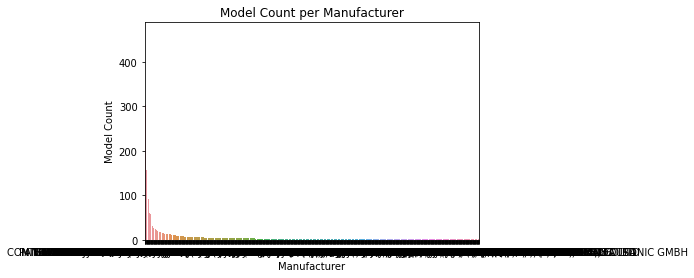

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x=model_count_per_manufacturer.index, y=model_count_per_manufacturer["MODELS"])
plt.xlabel('Manufacturer')
plt.ylabel('Model Count')
plt.title('Model Count per Manufacturer')
plt.show()
